In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import frame_whitening as fw
import frame_whitening.data as fwd

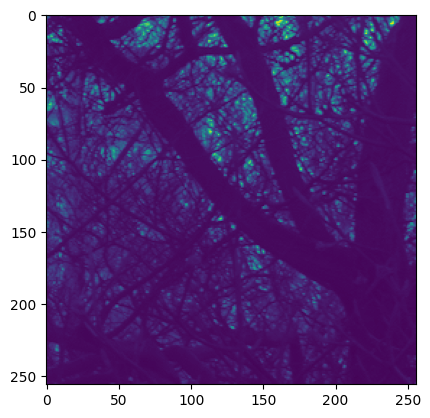

In [2]:
data_dir = "/mnt/home/tyerxa/ceph/datasets/datasets/vanhateren_imc"
files = sorted(os.listdir(data_dir))
# n_images = 10
# rand_idx = np.random.choice(range(len(files)), n_images, replace=False)

seed = 42069
rng = np.random.default_rng(seed)

img = fwd.load_image(rng=rng)

img = img / np.max(img)

plt.imshow(img)

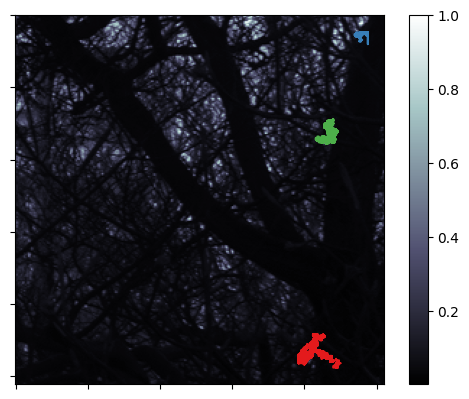

In [21]:
patch_h, patch_w = 12, 12
img_h, img_w = img.shape

sigma = .1
n_steps = 20_000

fig, ax = plt.subplots(1, 1)
im = ax.imshow(img, cmap="bone")
plt.colorbar(im)
ax.set(xticklabels=[], yticklabels=[])

n_contexts = 3
cols = sns.color_palette("Set1", n_contexts)

all_contexts, walk_coords = fwd.get_contexts(img, patch_h, patch_w, n_contexts, sigma, n_steps, pad_factor=1)
for idx, walk_hw in enumerate(walk_coords):
    walk_h, walk_w = walk_hw[:, 0], walk_hw[:, 1]
    ax.plot(walk_h, walk_w, color=cols[idx])

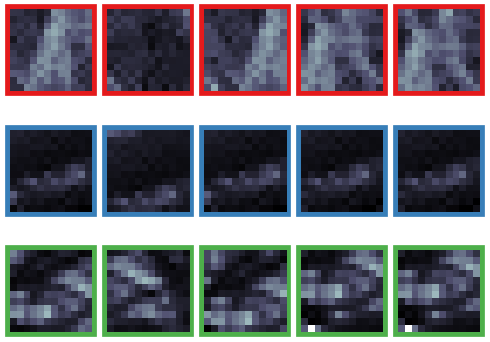

In [22]:
fwd.plot_context_samples(all_contexts, 5)

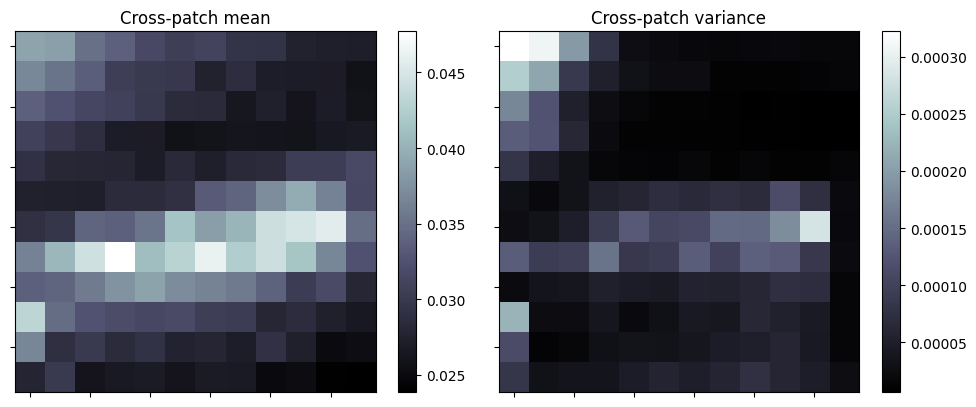

In [24]:
fwd.plot_patch_stats(all_contexts[1])

In [19]:
conv_h, conv_w = 4, 4
W = fw.get_conv_frame(patch_h, patch_w, conv_h, conv_w)

In [33]:
X = all_contexts[0]
X0 = X.reshape(n_steps, -1)
X0 = X0 - np.mean(X0, axis=0)
X0 = X0 * 150

X0.var(axis=0)

array([0.69532206, 0.83056423, 0.84732414, 1.03384061, 1.17409984,
       1.18795521, 1.17168932, 1.22260826, 1.10203093, 1.19355106,
       1.20196971, 1.27731415, 0.56070495, 0.7897235 , 0.9797266 ,
       1.07948569, 1.14931667, 1.23355954, 1.29350146, 1.20314938,
       1.20529215, 1.12572579, 1.26877383, 1.26564279, 0.53899739,
       0.7279674 , 1.02078618, 1.28954161, 1.33655125, 1.43127829,
       1.44133534, 1.40986607, 1.23491044, 1.24185109, 1.27885022,
       1.38169414, 0.54292361, 0.76851657, 1.18331597, 1.32682531,
       1.47218904, 1.54345012, 1.49088815, 1.4932942 , 1.30592873,
       1.22924695, 1.23596532, 1.26434643, 0.61075247, 0.919914  ,
       1.30566093, 1.54088128, 1.50271786, 1.63915803, 1.58465295,
       1.47586541, 1.27500507, 1.18856641, 1.13857367, 1.21009792,
       0.73837076, 1.06163576, 1.44602839, 1.57211344, 1.68980497,
       1.6874037 , 1.65003459, 1.48235572, 1.35070888, 1.18015752,
       1.13906907, 1.09621046, 0.98126471, 1.22047141, 1.42985